# Lecture 6.3: Multiple Regressions II

## Outline

* Dummy variables for indicator and categorical data
* Interaction terms
    * Interactions between continuous and categorical variables
    * Interactions between continuous and continuous variables
* Variable selection - stepwise regression

In [1]:
%pylab inline
import pandas as pd
import statsmodels.api as sm

from seaborn import lmplot

Populating the interactive namespace from numpy and matplotlib


In [2]:
fake_puppy_data = pd.DataFrame()
fake_puppy_data['num_puppies'] = np.abs(np.random.normal(3,4,size=1000)).round()
fake_puppy_data[fake_puppy_data['num_puppies']==0] = 1
other_animals = ['yes','no']
fake_puppy_data['has_other_animals'] = np.random.choice(other_animals,replace=True,size=1000,p=[0.2,0.8])
age_groups = ['puppy','dog','elderly dog']
fake_puppy_data['age_group'] = np.random.choice(age_groups,replace=True,size=1000,p=[0.5,0.2,0.3])
fake_puppy_data['score'] = 4.231  * fake_puppy_data['num_puppies'] + \
                           24.213 * (fake_puppy_data['has_other_animals']=='yes') + \
                           -0.340 * (fake_puppy_data['has_other_animals']=='no') + \
                           20.453 * (fake_puppy_data['age_group']=='puppy') + \
                           -6.543 * (fake_puppy_data['age_group']=='dog') + \
                           14.568 * (fake_puppy_data['age_group']=='elderly dog') + \
                           6.574  * (fake_puppy_data['num_puppies'] * 1.*(fake_puppy_data['has_other_animals'] == 'yes')) + \
                           3.486  * (fake_puppy_data['num_puppies'] * 1.*(fake_puppy_data['age_group'] == 'puppy')) + \
                           0.182  * (fake_puppy_data['num_puppies'] * 1.*(fake_puppy_data['age_group'] == 'elderly dog')) + \
                           12.381 + \
                           np.random.normal(15,3,size=1000)
fake_puppy_data['score'] = 100 * ((fake_puppy_data['score']-fake_puppy_data['score'].min())/(fake_puppy_data['score'].max() - fake_puppy_data['score'].min()))

## More stories

My wife likes pictures of puppies. To document this I had her look at and score 1000 photos of puppies (I did not actually do this one in real life).

In [3]:
fake_puppy_data.head(15)

,num_puppies,has_other_animals,age_group,score
0,1.0,no,dog,4.172862
1,1.0,no,puppy,16.218760
2,6.0,no,puppy,33.032914
3,5.0,no,puppy,31.033705
4,7.0,no,dog,14.456293
5,2.0,no,puppy,21.774549
6,9.0,no,puppy,44.074615
7,4.0,no,puppy,27.471743
8,1.0,no,dog,2.227700
9,8.0,yes,elderly dog,59.459919


### Data dictionary

* num_puppies is number of puppies in the photo
* has_other_animals is yes if there are other animals in photo, no otherwise
* age_group describes the average age of the dogs in the photo, either puppy, dog, or elderly dog



### Question:
Can I run my current data through statsmodels?

#### DON'T RUN BELOW. IT WILL CRASH AS IT CANNOT BE RUN AS IT IS.

In [ ]:
X = fake_puppy_data[['num_puppies','has_other_animals','age_group']]
y = fake_puppy_data.score
model = sm.OLS(y, X)

## Any ideas on how to deal with this?

## Add dummy variables

In [4]:
data = fake_puppy_data.copy()

In [5]:
data['others_yes'] = 1 * (data.has_other_animals == 'yes') 
data.head(15)

,num_puppies,has_other_animals,age_group,score,others_yes
0,1.0,no,dog,4.172862,0
1,1.0,no,puppy,16.218760,0
2,6.0,no,puppy,33.032914,0
3,5.0,no,puppy,31.033705,0
4,7.0,no,dog,14.456293,0
5,2.0,no,puppy,21.774549,0
6,9.0,no,puppy,44.074615,0
7,4.0,no,puppy,27.471743,0
8,1.0,no,dog,2.227700,0
9,8.0,yes,elderly dog,59.459919,1


## How the dummy variable works  
  

$x_i = \left\{\begin{array}{11} 1 & \mbox{if ith picture has other animals} \\ 0 & \mbox{if ith picture has no other animals} \end{array} \right. $

$$y_i \sim \beta_0 + \beta_1 x_i + \epsilon_i = \left\{\begin{array}{11} \beta_0 + \beta_1 + \epsilon_i & \mbox{if ith picture has other animals} \\ \beta_0 + \epsilon_i & \mbox{if ith picture has no other animals} \end{array} \right.$$

## Important 

When you do this you are changing the interpretation of your intercept.  
* What did the intercept mean before?
* What does it mean now?

## Categorical variables

* Basically the same as dummy variables, but with more than two levels
* In general you need number of categories - 1 columns to encode a categorical variable

In [6]:
data['puppy'] = 1 * (data.age_group == 'puppy')
data['elderly'] = 1 * (data.age_group == 'elderly dog')
data.head(15)

,num_puppies,has_other_animals,age_group,score,others_yes,puppy,elderly
0,1.0,no,dog,4.172862,0,0,0
1,1.0,no,puppy,16.218760,0,1,0
2,6.0,no,puppy,33.032914,0,1,0
3,5.0,no,puppy,31.033705,0,1,0
4,7.0,no,dog,14.456293,0,0,0
5,2.0,no,puppy,21.774549,0,1,0
6,9.0,no,puppy,44.074615,0,1,0
7,4.0,no,puppy,27.471743,0,1,0
8,1.0,no,dog,2.227700,0,0,0
9,8.0,yes,elderly dog,59.459919,1,0,1


## How this works  
  

$x_{i1} = \left\{\begin{array}{11} 1 & \mbox{if the ith picture has mostly puppies} \\ 0 & \mbox{if the ith picture does not have mostly puppies} \end{array} \right. $

$x_{i2} = \left\{\begin{array}{11} 1 & \mbox{if the ith picture has mostly elderly dogs} \\ 0 & \mbox{if the ith picture does not have mostly elderly dogs} \end{array} \right. $

$$y_i \sim \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \epsilon_i = \left\{\begin{array}{111} \beta_0 + \beta_1 + \epsilon_i & \mbox{if ith picture has mostly puppies} \\ \beta_0 + \beta_2 + \epsilon_i & \mbox{if ith picture has mostly elderly dogs} \\ \beta_0 + \epsilon_i & \mbox{if ith picture has mostly middle aged dogs}\end{array} \right.$$

## Once again
Interpretation of coefficients changes

* What is $\beta_0$ now?
* What is $\beta_1$?
* What is $\beta_2$?

## How do we use this?

In [7]:
data.head()

,num_puppies,has_other_animals,age_group,score,others_yes,puppy,elderly
0,1.0,no,dog,4.172862,0,0,0
1,1.0,no,puppy,16.218760,0,1,0
2,6.0,no,puppy,33.032914,0,1,0
3,5.0,no,puppy,31.033705,0,1,0
4,7.0,no,dog,14.456293,0,0,0


In [8]:
y = data.score
X = data[['num_puppies','others_yes','puppy','elderly']]
X = sm.add_constant(X)  # <- add in constant term

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     3081.
Date:                Wed, 05 Oct 2016   Prob (F-statistic):               0.00
Time:                        16:57:15   Log-Likelihood:                -2800.1
No. Observations:                1000   AIC:                             5610.
Df Residuals:                     995   BIC:                             5635.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const          -4.2031      0.336    -12.498      0.000        -4.863    -3.543
num_puppies     3.1382      0.044     71.203      0.000         3.052     3.225
others_yes     22.0224      0.320     68.759      0.000        21.394    22.651
puppy          18.1394      0.329     55.056      0.000        17.493    18.786
elderly         9.9281      0.360     27.583      0.000         9.222    10.634
==============================================================================
Omnibus:                      151.771   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              915.597
Skew:                           0.532   Prob(JB):                    1.52e-199
Kurtosis:                       7.565   Cond. No.                         20.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Note before we move on

You can add dummy variables to a data frame automatically with pd.get_dummies

### Important
This adds columns for all categories, so it does not have a baseline, you can remove the columns you don't want afterwards

In [9]:
test = pd.get_dummies(fake_puppy_data)
test.head()

,num_puppies,score,has_other_animals_no,has_other_animals_yes,age_group_dog,age_group_elderly dog,age_group_puppy
0,1.0,4.172862,1.0,0.0,1.0,0.0,0.0
1,1.0,16.218760,1.0,0.0,0.0,0.0,1.0
2,6.0,33.032914,1.0,0.0,0.0,0.0,1.0
3,5.0,31.033705,1.0,0.0,0.0,0.0,1.0
4,7.0,14.456293,1.0,0.0,1.0,0.0,0.0


Our model before was fairly good, but how to investigate?

Since we only have 1 continuous variable we can visualize in two dimensions, and we would expect different offsets for each line, but the same slope.

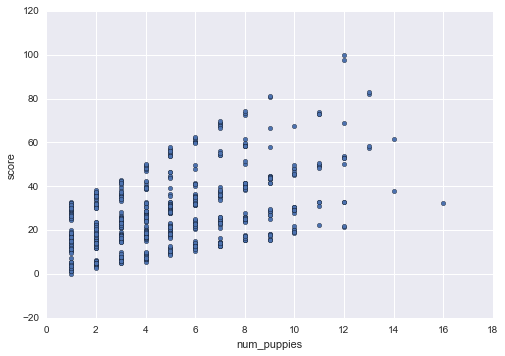

In [10]:
data.plot(x='num_puppies', y='score', kind='scatter');

## Lets try to clear this up a little

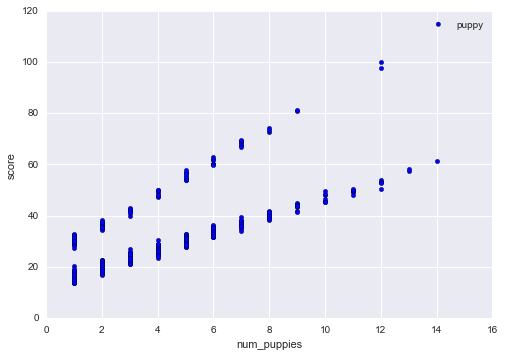

In [11]:
p_data = data[data.puppy == 1]
p_data.plot(x='num_puppies', y='score', kind='scatter', color='b', label='puppy');

### Our model assumes that the slopes of these lines are the same

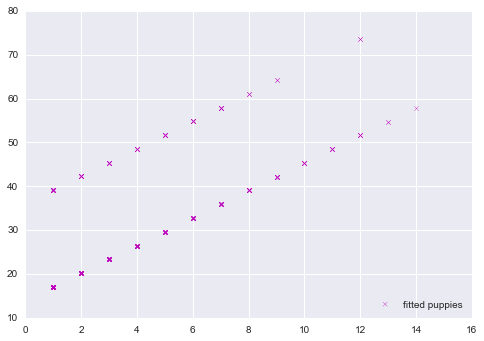

In [12]:
scatter(p_data.num_puppies,
        results.fittedvalues[data.puppy == 1],
        color='m',
        marker='x',
        label='fitted puppies')
legend(loc=4);

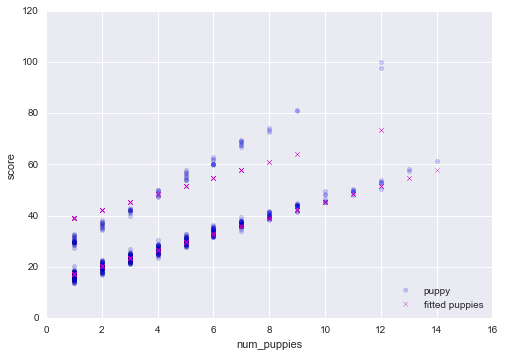

In [13]:
p_data.plot(x='num_puppies', y='score', kind='scatter', color='b', label='puppy', alpha=.2)
scatter(p_data.num_puppies,
        results.fittedvalues[data.puppy == 1],
        color='m',
        marker='x',
        label='fitted puppies')
legend(loc=4);

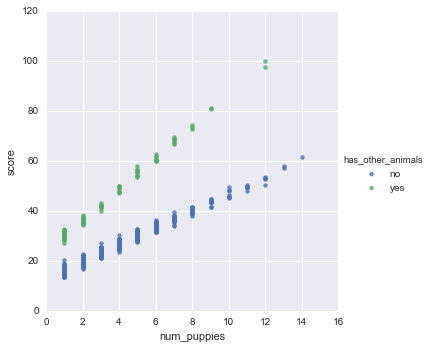

In [14]:
lmplot('num_puppies', 'score', p_data, 'has_other_animals', fit_reg=False);

## Interactions

We can add interaction terms by multiplying columns together
$$y \sim \beta_0 + \beta_1 \times x_1 + \beta_2 \times x_2 + \beta_3 \times x_1 \times x_2 $$
so if $x_2$ is other animals:
$$y_i = \left\{\begin{array}{11} (\beta_0 + \beta_2) + (\beta_1 + \beta_3) \times x_{1i} + \epsilon_i & \mbox{if the ith photo has other animals} \\ \beta_0 + \beta_1 \times x_{1i} + \epsilon_i & \mbox{if ith picture has no other animals} \end{array} \right.$$

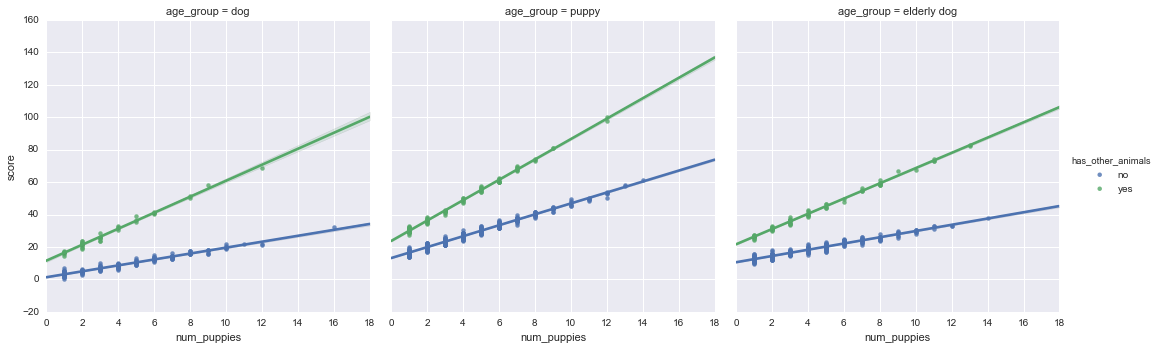

In [15]:
lmplot('num_puppies', 'score', fake_puppy_data, 'has_other_animals', 'age_group');

To make our lives easier, we are going to start using R-style formulas courtesy of the library [`patsy`](http://patsy.readthedocs.io/en/latest/) which should have been installed automatically along with statsmodels.

In [16]:
import statsmodels.formula.api as smf

In [17]:
model2 = smf.ols(formula='score ~ num_puppies + has_other_animals + age_group', data=fake_puppy_data)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     3081.
Date:                Wed, 05 Oct 2016   Prob (F-statistic):               0.00
Time:                        16:57:48   Log-Likelihood:                -2800.1
No. Observations:                1000   AIC:                             5610.
Df Residuals:                     995   BIC:                             5635.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                   -4.2031      0.336    -12.498      0.000        -4.863    -3.543
has_other_animals[T.yes]    22.0224      0.320     68.759      0.000        21.394    22.651
age_group[T.elderly dog]     9.9281      0.360     27.583      0.000         9.222    10.634
age_group[T.puppy]          18.1394      0.329     55.056      0.000        17.493    18.786
num_puppies                  3.1382      0.044     71.203      0.000         3.052     3.225
==============================================================================
Omnibus:                      151.771   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              915.597
Skew:                           0.532   Prob(JB):                    1.52e-199
Kurtosis:                       7.565   Cond. No.                         20.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notice that when we use a formula, `patsy` automatically adds an Intercept term and transforms categorical variables into dummies.

In [18]:
data.head()

,num_puppies,has_other_animals,age_group,score,others_yes,puppy,elderly
0,1.0,no,dog,4.172862,0,0,0
1,1.0,no,puppy,16.218760,0,1,0
2,6.0,no,puppy,33.032914,0,1,0
3,5.0,no,puppy,31.033705,0,1,0
4,7.0,no,dog,14.456293,0,0,0


We can also use formulas to model interactions:

In [19]:
formula = 'score ~ num_puppies * others_yes + puppy + elderly'

In [20]:
model3 = smf.ols(formula = formula,data = data)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     6486.
Date:                Wed, 05 Oct 2016   Prob (F-statistic):               0.00
Time:                        16:57:58   Log-Likelihood:                -2339.6
No. Observations:                1000   AIC:                             4691.
Df Residuals:                     994   BIC:                             4721.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                 -1.8550      0.221     -8.402      0.000        -2.288    -1.422
num_puppies                2.6162      0.031     84.635      0.000         2.556     2.677
others_yes                11.1604      0.346     32.298      0.000        10.482    11.839
num_puppies:others_yes     2.7465      0.071     38.763      0.000         2.607     2.886
puppy                     18.0063      0.208     86.558      0.000        17.598    18.415
elderly                    9.4897      0.228     41.711      0.000         9.043     9.936
==============================================================================
Omnibus:                        0.092   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.955   Jarque-Bera (JB):                0.069
Skew:                           0.020   Prob(JB):                        0.966
Kurtosis:                       3.006   Cond. No.                         24.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

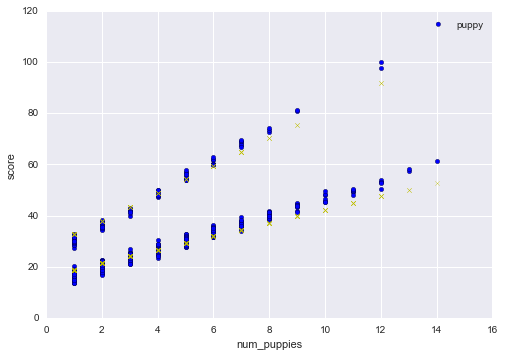

In [21]:
p_data.plot(x='num_puppies',y='score',kind='scatter',color='b',label='puppy')
scatter(p_data.num_puppies, results3.fittedvalues[data['puppy']==1], color='y', marker='x' ,label = 'fitted puppies');

## Interactions between multiple continuous variables

We can add interaction terms by multiplying columns together
$$y \sim \beta_0 + \beta_1 \times x_1 + \beta_2 \times x_2 + \beta_3 \times x_1 \times x_2 $$
so if $x_1$ and $x_2$ are both continuous:
$$y_i = \beta_0 + (\beta_1 + \beta_3 \times x_{2i}) \times x_{1i} + \beta_2 \times x_{2i}$$

So, the value of the coefficient for $x_1$ now depends on the value of $x_2$.  
For interpretation you still consider the other variables held constant, but when there are interactions you cannot say how much one will improve without specifying the value the other one is held constant at.

## Stepwise Regression

Stepwise regression is a good simple tool for determining parameters to include in models. Care must be taken in its use, as it is easy to fall into the trap of trusting it more than you should. If you have a large number of parameters, or a small amount of data, it is probably best to use another tool. There are multiple ways to perform stepwise regression, the general procedures for stepwise regression are:

* Forward Stepwise Regression:
    * Start with some form of minimal model (like intercept only)
    * Add other variables into your model based on which ones maximally increase adjusted $R^2$ (or some other test criteria)
    * Continue until you run out of variables or adding any variable reduces the quality of your  model
* Backward Stepwise Regression:
    * Start with some form of maximal model (include all variables)
    * Remove variables that least improve the model (or have insignificant p-values), one at a time
    * Stop when you can no longer improve your model by removing variables
* Bidirectional Stepwise Regression:
    * Do both of the above

## Useful things to know

In order to implement stepwise regression you have to know how to compare models. There are several ways to do this:

* Adjusted $R^2$, AIC, BIC, F-test. These are model quality metrics (will discuss more on next slide)
* p-values for coefficients. These can be used to evaluate importance of individual predictors for the model.
* Others I haven't mentioned

## Model quality metrics
* Adjusted $R^2$  
$$Adjusted\ R^2 = 1 - {\frac{RSS}{(n-k-1)} \over \frac{TSS}{(n-1)}}$$
    * Want adjusted $R^2$ close to one, includes penalties for number of predictors (k)  

* AIC (Akaike Information Criterion)  
$$AIC = -2log(L) + 2k$$
    * L is likelihood for the model and k is number of predictors, want the model with the lowest AIC value  
    
* BIC (Bayesian Information Criterion)
$$BIC = -2log(L) + 2log(n)$$
    * Very similar to AIC, but since log(n) > 2 for n > 7 adds a larger penalty for additional predictors, once again want the lowest. n is the sample size.  

## Backward stepwise example

In [22]:
boring_fake_data_1 = pd.DataFrame()
boring_fake_data_1['A'] = np.random.normal(25,5,1000)
boring_fake_data_1['C'] = np.random.normal(75,15,1000)
boring_fake_data_1['B'] = 5 * boring_fake_data_1['A'] - 2 * boring_fake_data_1['C'] + np.random.normal(20,3,1000)
boring_fake_data_1['D'] = np.random.uniform(-50,50,1000)
boring_fake_data_1['response'] = 50 * boring_fake_data_1['A'] + \
                                 3 * boring_fake_data_1['B'] + \
                                 50 * boring_fake_data_1['C'] + \
                                 50 + np.random.normal(350,150,1000)

In [23]:
boring_fake_data_1.head()

,A,C,B,D,response
0,30.491827,74.412301,23.554436,47.580446,5720.862964
1,38.490343,98.438391,9.922907,-38.965109,7518.401238
2,16.048248,83.190449,-59.261077,-46.355409,5087.466858
3,23.453789,57.239373,24.395456,37.433237,4622.379080
4,18.527440,91.814029,-72.814623,31.462165,5573.733563


## Fit the full model with all of the independent variables

In [24]:
formula = 'response ~ A + B + C + D'
model1 = smf.ols(formula=formula, data=boring_fake_data_1)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     6289.
Date:                Wed, 05 Oct 2016   Prob (F-statistic):               0.00
Time:                        16:58:11   Log-Likelihood:                -6438.5
No. Observations:                1000   AIC:                         1.289e+04
Df Residuals:                     995   BIC:                         1.291e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    331.8376     47.210      7.029      0.000       239.195   424.480
A             38.3674      8.152      4.706      0.000        22.370    54.365
B              5.3680      1.621      3.311      0.001         2.187     8.549
C             55.0212      3.270     16.826      0.000        48.604    61.438
D              0.2189      0.166      1.320      0.187        -0.106     0.544
==============================================================================
Omnibus:                        1.569   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.456   Jarque-Bera (JB):                1.534
Skew:                           0.032   Prob(JB):                        0.464
Kurtosis:                       2.819   Cond. No.                         800.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Eliminate the least significant variable

In [25]:
formula = 'response ~ A + C + D'
model2 = smf.ols(formula=formula,data=boring_fake_data_1)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     8299.
Date:                Wed, 05 Oct 2016   Prob (F-statistic):               0.00
Time:                        16:58:15   Log-Likelihood:                -6444.0
No. Observations:                1000   AIC:                         1.290e+04
Df Residuals:                     996   BIC:                         1.292e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    443.1818     33.304     13.307      0.000       377.827   508.536
A             65.1920      0.922     70.704      0.000        63.383    67.001
C             44.2415      0.312    141.697      0.000        43.629    44.854
D              0.1991      0.167      1.196      0.232        -0.128     0.526
==============================================================================
Omnibus:                        0.944   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.624   Jarque-Bera (JB):                0.987
Skew:                           0.007   Prob(JB):                        0.611
Kurtosis:                       2.847   Cond. No.                         553.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## And again

In [26]:
formula = 'response ~ A + C'
model3 = smf.ols(formula=formula,data=boring_fake_data_1)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 1.244e+04
Date:                Wed, 05 Oct 2016   Prob (F-statistic):               0.00
Time:                        16:58:22   Log-Likelihood:                -6444.7
No. Observations:                1000   AIC:                         1.290e+04
Df Residuals:                     997   BIC:                         1.291e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    443.0048     33.311     13.299      0.000       377.637   508.373
A             65.2047      0.922     70.708      0.000        63.395    67.014
C             44.2409      0.312    141.665      0.000        43.628    44.854
==============================================================================
Omnibus:                        0.862   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.650   Jarque-Bera (JB):                0.916
Skew:                           0.006   Prob(JB):                        0.633
Kurtosis:                       2.852   Cond. No.                         553.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""